## 라이브러리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 한글폰트 설정

In [2]:
# 한글 폰트 설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기, 전처리

In [3]:
df=pd.read_csv("서울시 기간별 일평균 대기환경 정보.csv", encoding='cp949')
df.columns = ['측정일자', '권역명', '측정소명', '미세먼지', '초미세먼지', '오존',
       '이산화질소농도', '일산화탄소농도', '아황산가스농도']

In [4]:
df.shape

(9050, 9)

In [4]:
# 측정일자를 datetime64로 변경 후 날짜별로 정렬
df["측정일자"] = pd.to_datetime(df["측정일자"].astype('str'))
df = df.sort_values("측정일자")

In [5]:
# 전국 평균값 저장하기
df_mean = df.groupby(["측정일자"], as_index = False).mean()
df_mean.columns = ["측정일자", "미세먼지평균", "초미세먼지평균", "오존평균", "이산화질소농도평균","일산화탄소농도평균","아황산가스농도평균"]
df_mean["측정일자"] = pd.to_datetime(df_mean["측정일자"].astype("str"))

In [6]:
# 구별로 데이터프레임 만들기
gu_list = df["측정소명"].unique()
df_gu_list = [df[df["측정소명"] == gu] for gu in gu_list]

## 선택한 지역과 전국 평균을 plot

In [7]:
# 확인할 구 선택
print("확인할 구를 선택하세요")
for i in range(len(gu_list)):
    print(str(i) + "." + gu_list[i], end=" ")
num = int(input())
df_gu_list[num]

확인할 구를 선택하세요
0.강동구 1.중구 2.종로구 3.용산구 4.은평구 5.서대문구 6.마포구 7.광진구 8.성동구 9.중랑구 10.동대문구 11.성북구 12.송파구 13.강북구 14.서초구 15.강남구 16.양천구 17.금천구 18.관악구 19.도봉구 20.영등포구 21.구로구 22.강서구 23.노원구 24.동작구 5


,측정일자,권역명,측정소명,미세먼지,초미세먼지,오존,이산화질소농도,일산화탄소농도,아황산가스농도
9029,2021-05-25,서북권,서대문구,87,35,0.042,0.013,0.5,0.004
9004,2021-05-26,서북권,서대문구,40,17,0.040,0.014,0.5,0.004
8979,2021-05-27,서북권,서대문구,33,19,0.045,0.011,0.5,0.004
8954,2021-05-28,서북권,서대문구,35,19,0.041,0.013,0.6,0.003
8929,2021-05-29,서북권,서대문구,15,10,0.038,0.010,0.5,0.004
...,...,...,...,...,...,...,...,...,...
104,2022-05-21,서북권,서대문구,38,22,0.046,0.014,0.5,0.004
79,2022-05-22,서북권,서대문구,41,24,0.064,0.011,0.5,0.004
54,2022-05-23,서북권,서대문구,74,48,0.083,0.018,0.7,0.005
29,2022-05-24,서북권,서대문구,36,19,0.039,0.017,0.4,0.004


In [8]:
# 선택한 구와 전체 평균 데이터 합치기
df_sel = pd.merge(df_gu_list[num],df_mean, on="측정일자")

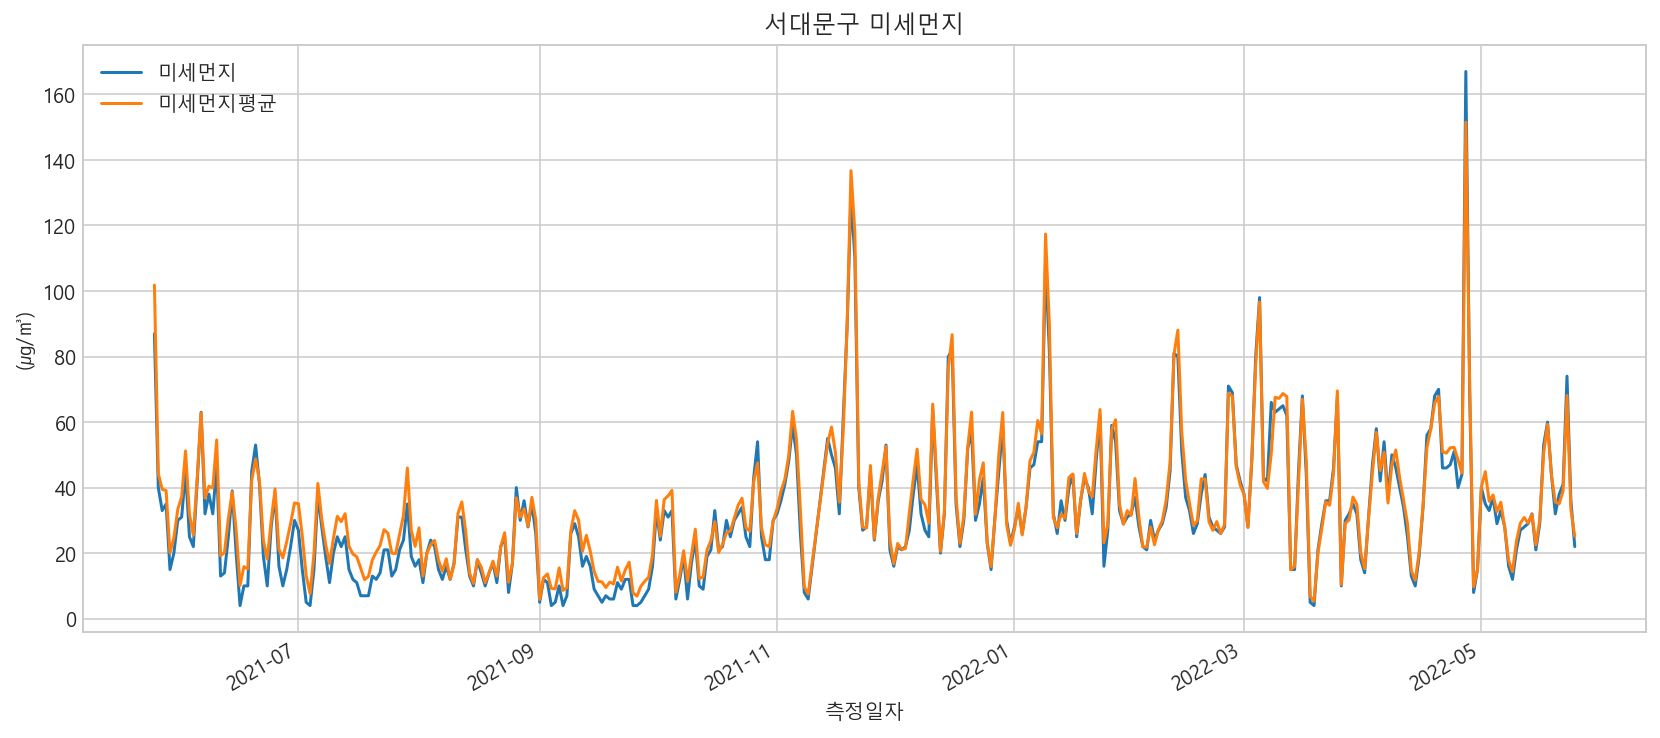

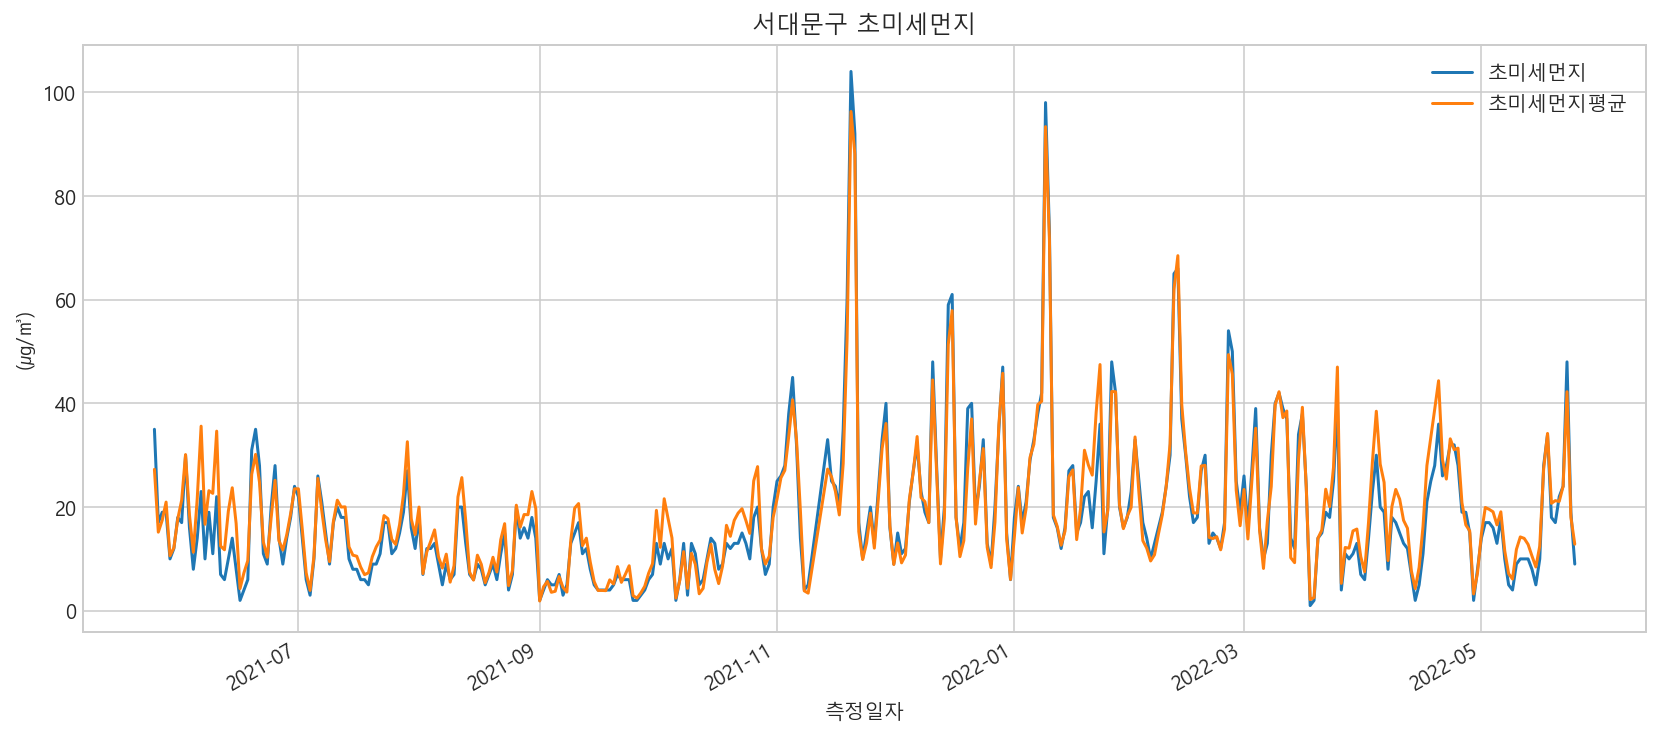

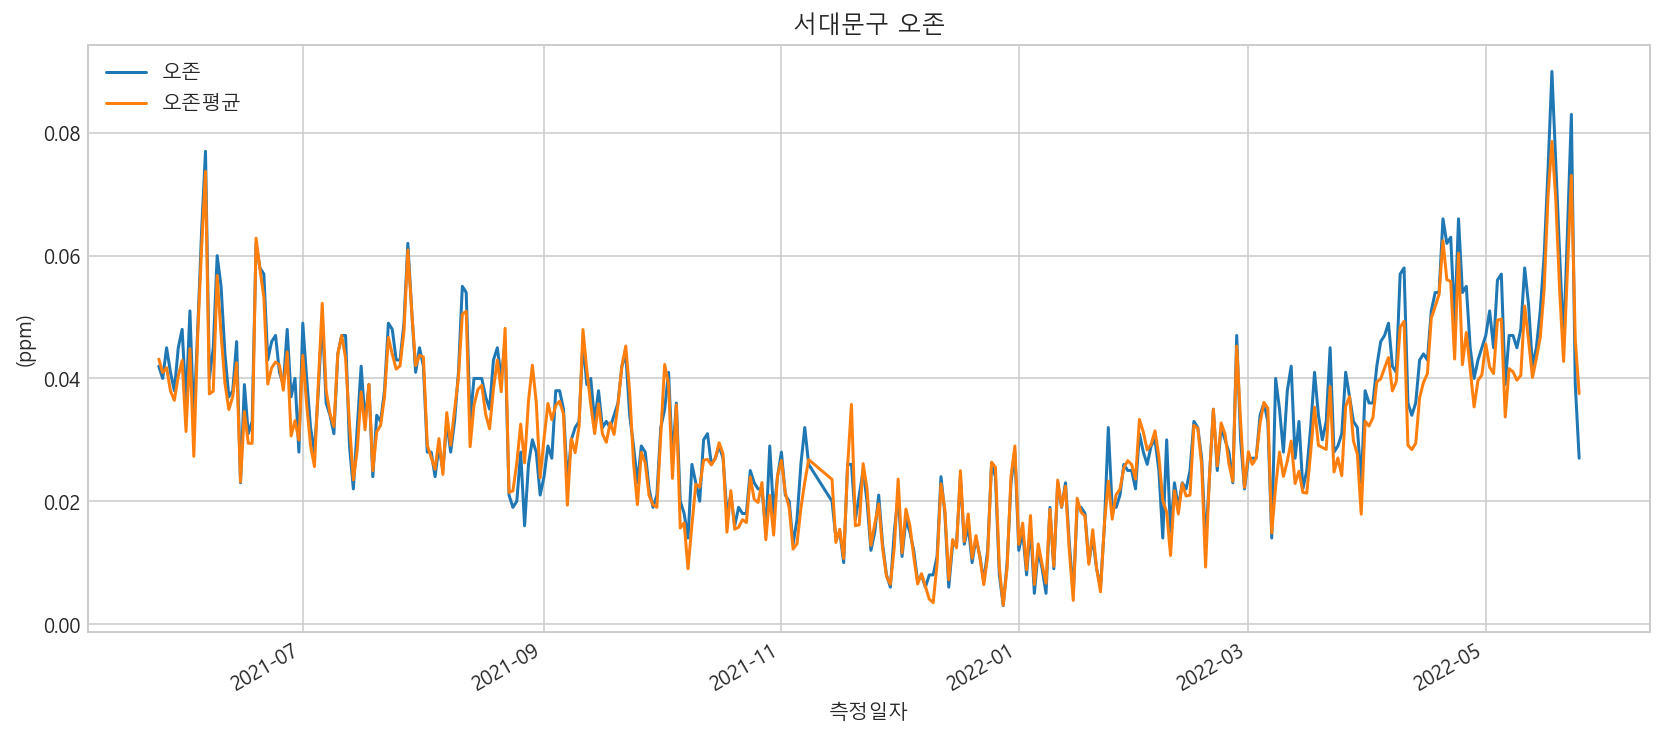

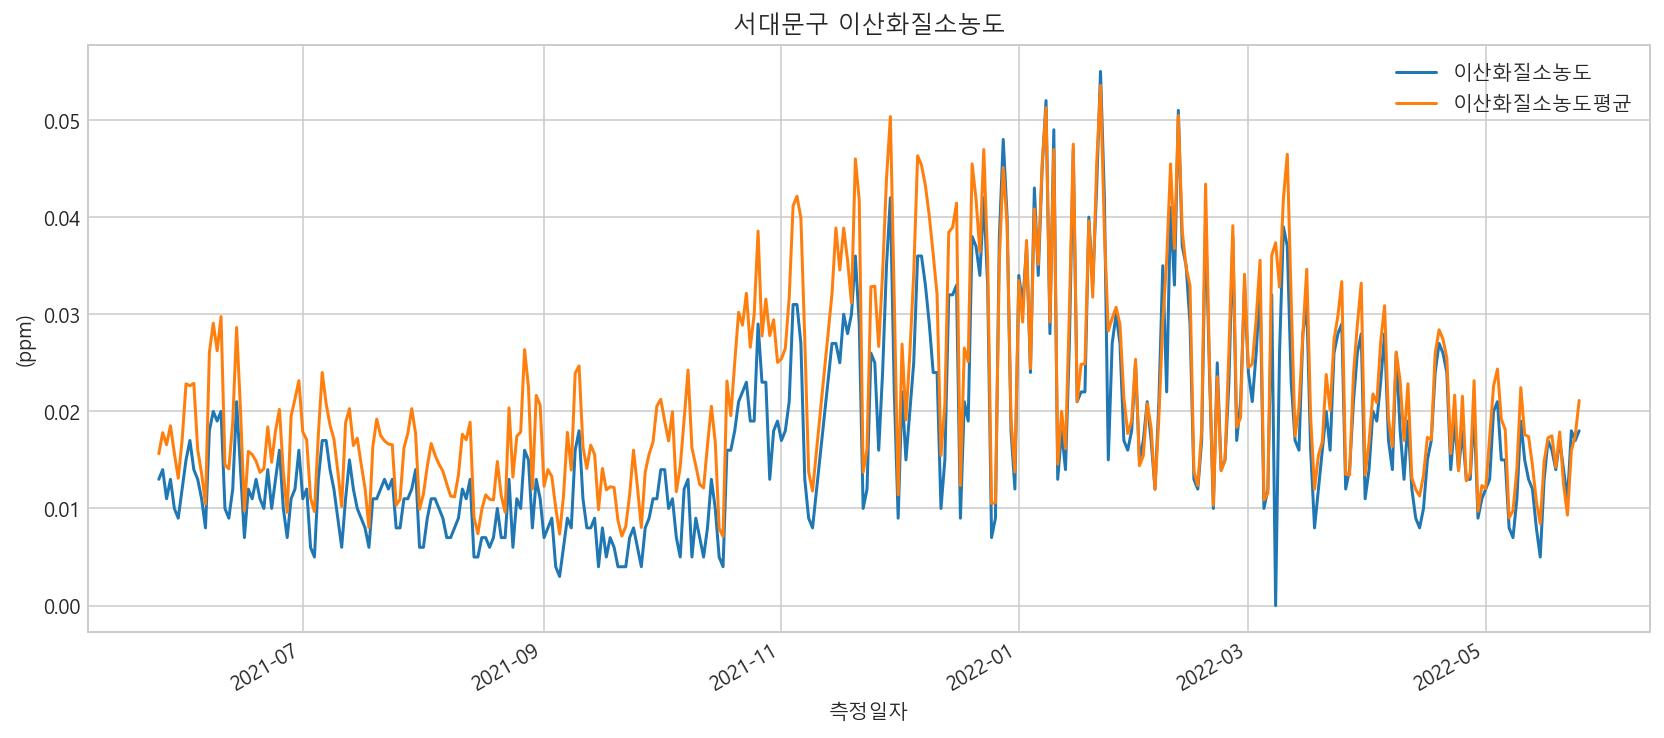

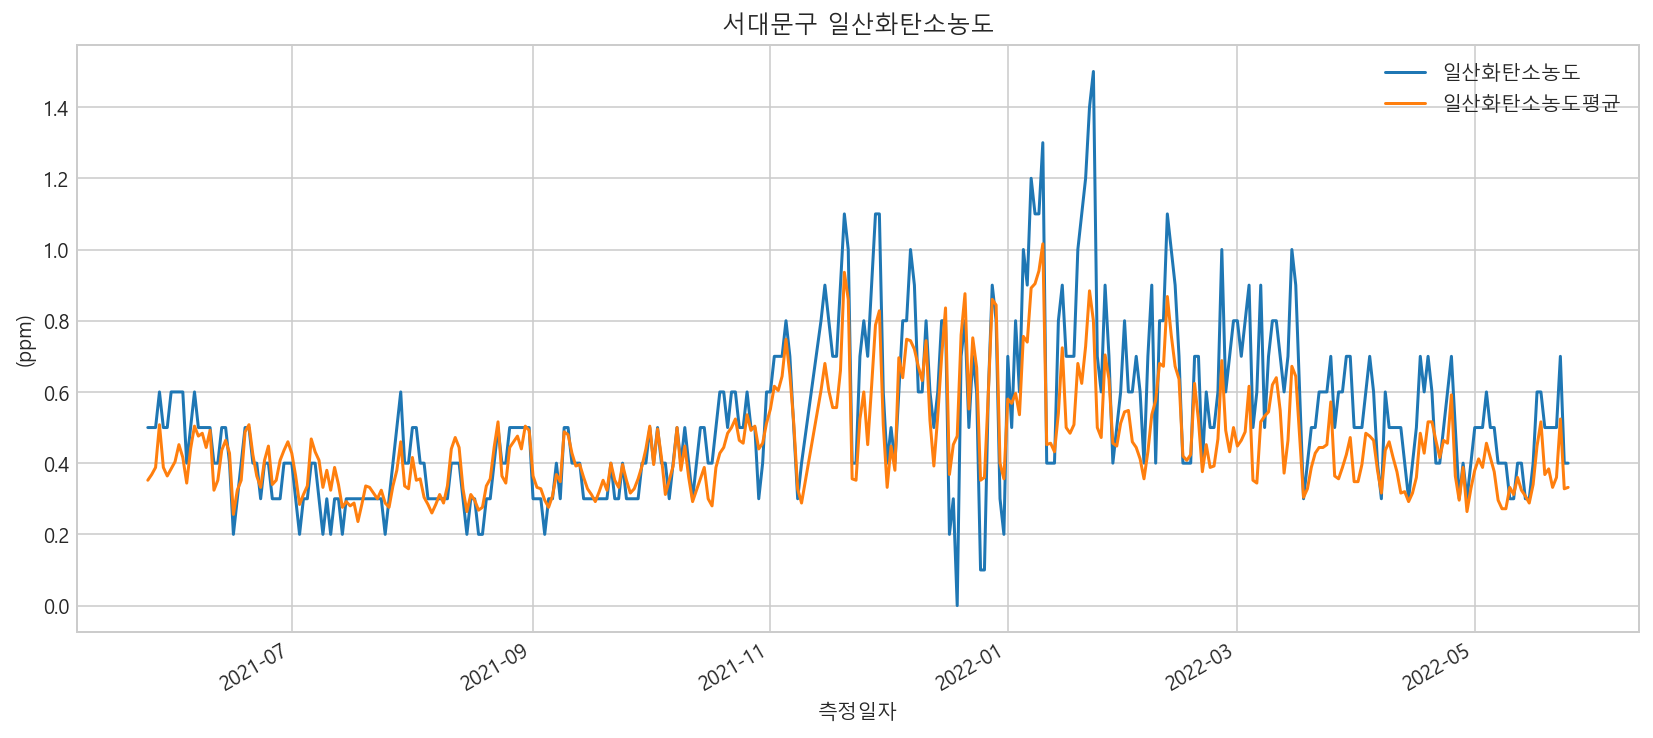

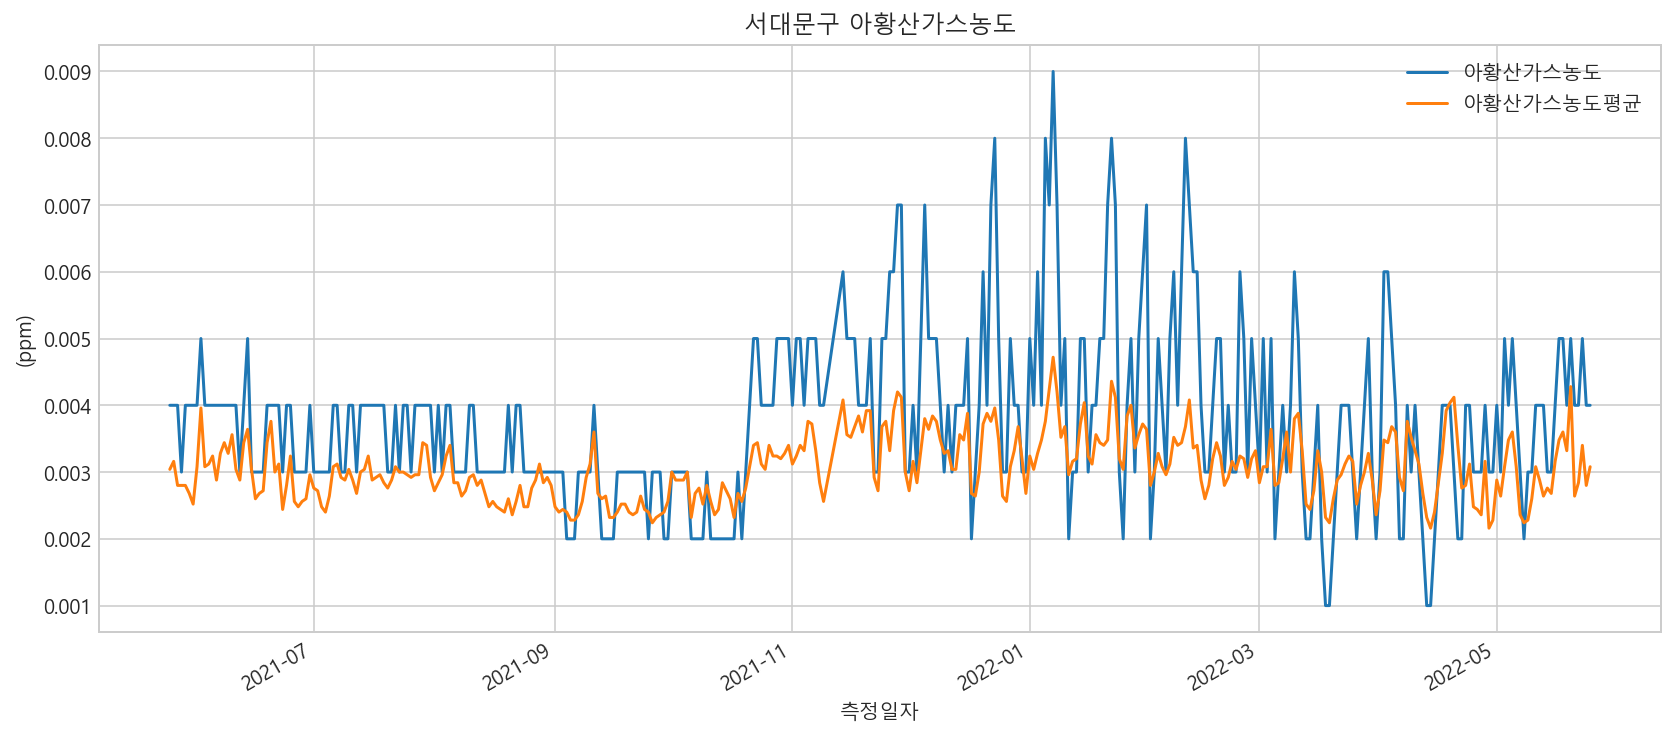

In [9]:
# 단위 찾기
def find_unit(data):
    unit = ["(㎍/㎥)", "(㎍/㎥)", "(ppm)", "(ppm)", "(ppm)", "(ppm)"]
    for index, data_kind in enumerate(list(df.columns[3:])):
        if data == data_kind:
            return unit[index]
# plot 그리기
def drawplot(df, data):
    df[["측정일자",data,data+"평균"]].plot(x="측정일자",
                                               figsize = (14,6),
                                               title = gu_list[num] + " " + data,
                                               ylabel = find_unit(data),
                                              )
    
for data in list(df.columns[3:]):
    drawplot(df_sel, data)